# Assignment 2a Due

In this assigment you will explore and become familiar with writing and using algorithms to numerically approxomate definite integrals.

Assignment Overview:
* Impliment your own midpoint, trapazoid, and Simpson's rule integration algorithms
* Use those to solve a definite integral
* Compare your algorithms to those from scipy
* Compare all approximate solutions to the exact solutions


You can import only the following packages: numpy, math, scipy, matplotlib.pyplot

In [89]:
#your import cell
import numpy as np
import scipy.integrate as sp
import matplotlib.pyplot as plt

Now we can define our integration algorithms

In [90]:
#define midpoint rule
def mid(f, x0, xn, n): #Borrowed from integration lecture notes
    dx = (xn-x0)/float(n)
    a = dx*np.sum([f(x0 + (i+0.5)*dx) for i in range (0,n)])
    return a


In [91]:
#define trapazoidal rule
def trap(f, x0, xn, n): #Borrowed from integration lecture notes
    dx = (xn-x0)/float(n)
    a = dx*np.sum([0.5*(f(x0 +i*dx) + f(x0 + (i+1)*dx)) for i in range (0,n)])
    return a


In [92]:
#define simpson's rule
def simp(f,x0,xn,n): #Borrowed from integration lecture notes
    dx = (xn-x0)/float(n)
    s_odd = 0
    s_even = 0
    for i in range (1,n,2):
        s_odd += 4*f(x0 + i*dx) 
    for j in range (2,n-1,2):
        s_even += 2*f(x0 + j*dx) 
    area = (dx/3.0)*(f(x0) + s_even + s_odd + f(xn))
    return area

# Question 
Sanity checking your code is very important. How can you check that your functions are working properly?

## Answer: 

You can check that your functions are running properly by writing python unit test scripts which run test cases against your algorithm. Since these are all relatively simple, it might be best to just compare their asymptotic runtimes in a table or with a graph and make sure that they perform in polynomial time worst case

For this notebook assigment we would like to solve the integral\
$\int_{a}^{b} \frac{2}{(2^2 + x^2)^{3/2}}dx$

# Question
Have you seen an integral like this before in physics? From where?

## Answer: 

I can't remember exactly what it is but I recognize integrals of that form from calculating electric fields at a point some distance away from a charged object

Solve the above integral using the numerical integrations that you wrote. When defining the function we will integrate over do so using python's **lambda** function.

For the integration take $a = 0,\; b = 2,\;$ and we will split it up into 6 partitions.

# Question
What is the exact solution?

In [93]:
#exact solution to the integral
exact_solution = 0.3536 #Taken from WolframAlpha

In [94]:
#solve the integral using your integration functions
f = lambda x: 2 / ((4 + x**2)**1.5)

midpoint = mid(f, 0, 2, 6)
trapezoid = trap(f, 0, 2, 6)
simpson = simp(f, 0, 2, 6)

print("Midpoint Approximation: " + str(midpoint))
print("Trapezoid Approximation: " + str(trapezoid))
print("Simpson Approximation: " + str(simpson))

Midpoint Approximation: 0.3538599754585315
Trapezoid Approximation: 0.35293994641413146
Simpson Approximation: 0.3535517906244493


Use the trapz and simps methods from scipy's integration library to solve the integral.

Note: Shit+tab at the end of a function in jupyter notebook reveals lots of information about the function.

In [95]:
#scipy integration
dx = 2/6
n = np.arange(0, 2, dx)
sample = [f(x) for x in n]

simps = sp.simps(sample, n, dx)
trapz = sp.trapz(sample, n, dx)

# Question
How do scipy integrals compare to yours? Support your answer. 

In [96]:
#print the numerical values
print("Simpson: " + str(simps))
print("Trapezoid: " + str(trapz))

Simpson: 0.31989004123392856
Trapezoid: 0.31931786793619754


Numerically compare your midpoint, trapazoid, and Simpson method results to the exact value by calculating the quantity (approx - exact) / exact for each method. 

In [97]:
#numerical comparisons
def errorCalc(approx, exact):
    return (abs(approx-exact)/exact)*100

funcs = [("My Midpoint", midpoint), ("My Trapezoid",trapezoid), ("My Simpson",simpson), ("SciPy Simpson",simps), ("SciPy Trapezoid",trapz)]

for func in funcs:
    print(str(func[0]))
    print("Approximation: " + str(func[1]))
    print("Error: " + str(errorCalc(func[1], exact_solution)))
    print()

My Midpoint
Approximation: 0.3538599754585315
Error: 0.07352247130414548

My Trapezoid
Approximation: 0.35293994641413146
Error: 0.1866667380850027

My Simpson
Approximation: 0.3535517906244493
Error: 0.01363387317610942

SciPy Simpson
Approximation: 0.31989004123392856
Error: 9.533359379545098

SciPy Trapezoid
Approximation: 0.31931786793619754
Error: 9.695173094966766



# Question
Which method provides the best approximation to the exact solution?

It is often useful to represent the data graphically. Make a scatter plot showing the percent difference $100 \times \frac{approx. - exact}{exact}$ vs. integration method. Integration method on your x-axis should be strings such as *midpoint, trapazoid, and Simpson*. You should also draw on your plot a line at *y = 0*, which will help guide the eye where the perfect approximation (the exact solution) would sit. 

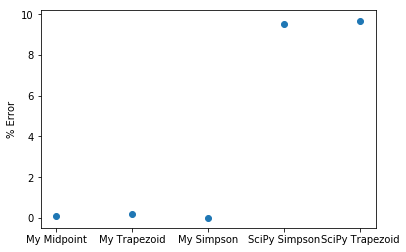

In [98]:
#plot
x = [func[0] for func in funcs]
y = [errorCalc(func[1], exact_solution) for func in funcs]

plt.scatter(x, y)
plt.ylabel("% Error")
plt.show()

Using the scipy *quad* integration method, approximate the following integral

$$\int_{-\infty}^{\infty} e^{-x^{2}} dx$$

Hint: Reference <a href="https://numpy.org/">numpy</a> and see what it has to offer in terms of functions and *special* values

In [99]:
#solve integral above
f = lambda r : np.e**(-r**2)

quad = sp.quad(f, -np.inf, np.inf)

# Question
If you square your solution, does the resulting number have any special meaning?

In [100]:
quad_sqr = quad[0]**2
quad_sqr

# It's Pi!

3.1415926535897936